In [1]:
import numpy as np
import matplotlib.pyplot as pl
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.1.24 (python 3.7.3) on 2019-10-28 18:32.


In [3]:
scv.settings.set_figure_params('scvelo', dpi_save=200, dpi=80, transparent=True)  # vectorized: pdf or svg
scv.settings.plot_prefix = 'scvelo_fig1_'
scv.settings.verbosity = 2

kwargs = {'fontsize': 18, 'size': 200, 'linewidth': 3, 'use_raw': True,
          'legend_loc': 'none', 'colorbar': False, 'frameon': False, 'title': ''}

#fit_kwargs = {'use_raw': True}

In [4]:
adata = scv.datasets.simulation(n_obs=500, t_max=25, beta=.3, gamma=.15, 
                                switches=[.5, .4, .3, .2], noise_level=1)
scv.tl.velocity(adata, mode='steady_state', vkey='steady_state_velocity', use_raw=True)

computing velocities
    finished (0:00:00)


In [5]:
# adata.write('data/manuscript/fig1.h5ad')
# adata = scv.read('data/manuscript/fig1.h5ad')

In [6]:
basis = adata.var_names[1]

scv.tl.velocity(adata, mode='steady_state', vkey='steady_state_velocity', use_raw=True)
dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True, max_iter=100)

computing velocities
    finished (0:00:00)
recovering dynamics
    finished (0:00:00)

outputs model fit of gene: 1


saving figure to file ./figures/scvelo_fig1_1.pdf


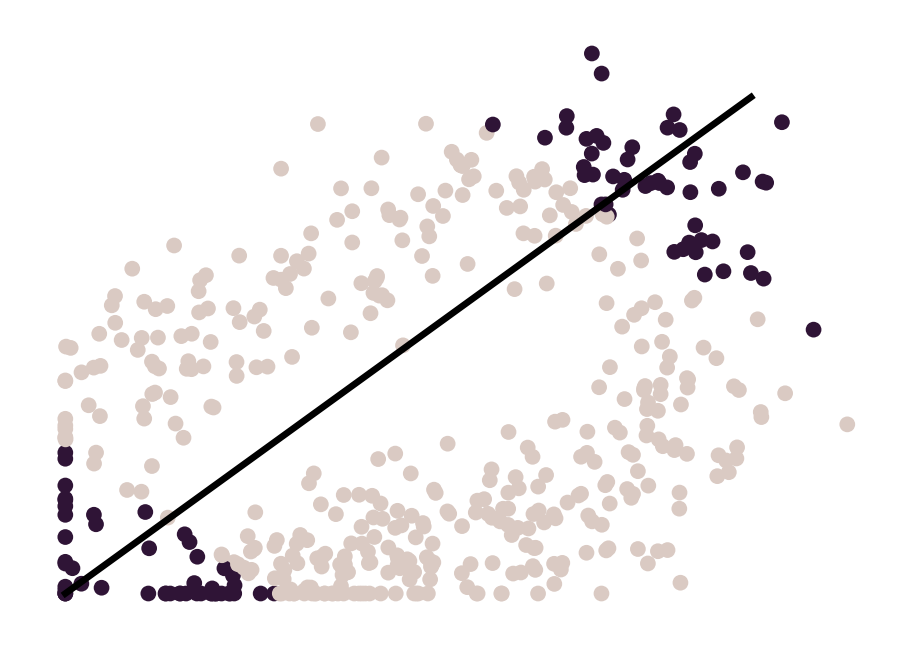

saving figure to file ./figures/scvelo_fig1_2.pdf


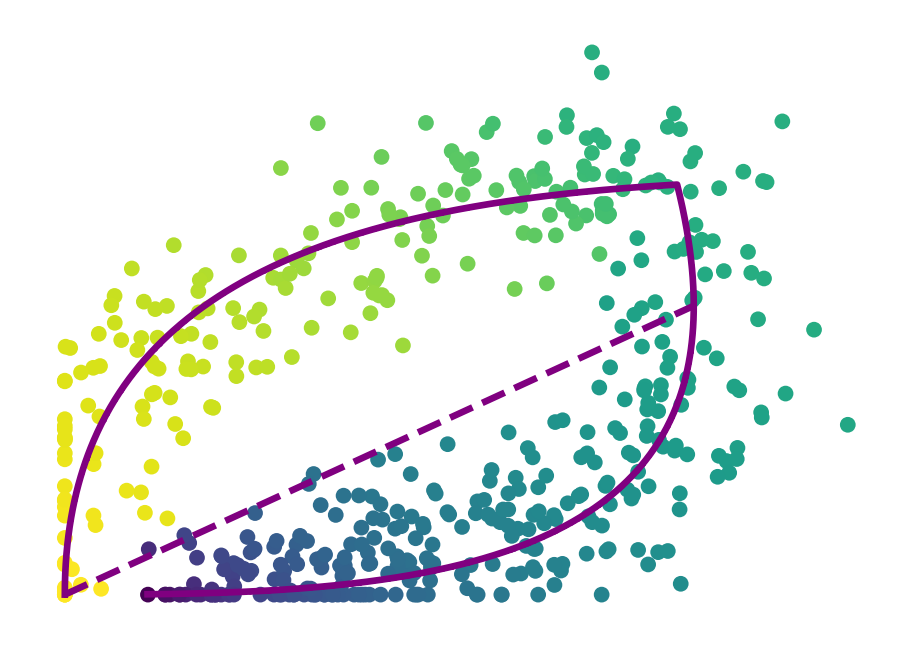

In [7]:
adata.obs['ss_weights'] = scv.utils.get_weight(adata[:, basis].layers['spliced'], 
                                               adata[:, basis].layers['unspliced'], perc=[10, 90]) * 1.01
#adata.uns['ss_weights_colors'] = ['lightgrey', 'darkslategrey']
#scv.utils.strings_to_categoricals(adata)

scv.pl.scatter(adata, basis=basis, vkey='steady_state_velocity', color='ss_weights', 
               color_map='twilight_shifted', vmin=-0.5, vmax=0.4, **kwargs, save='1')
scv.pl.scatter(adata, basis=basis, vkey='dynamics', color='fit_t', color_map='viridis_r', **kwargs, save='2')

computing velocities
    finished (0:00:00)


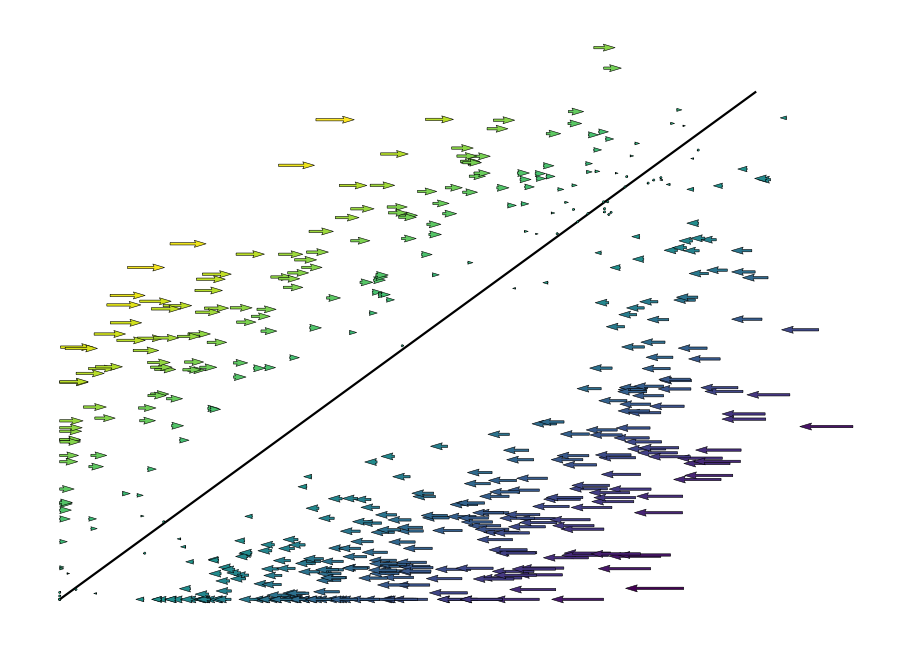

recovering dynamics
    finished (0:00:00)

outputs model fit of gene: 1
computing velocities
    finished (0:00:00)
saving figure to file ./figures/scvelo_fig1_3.pdf


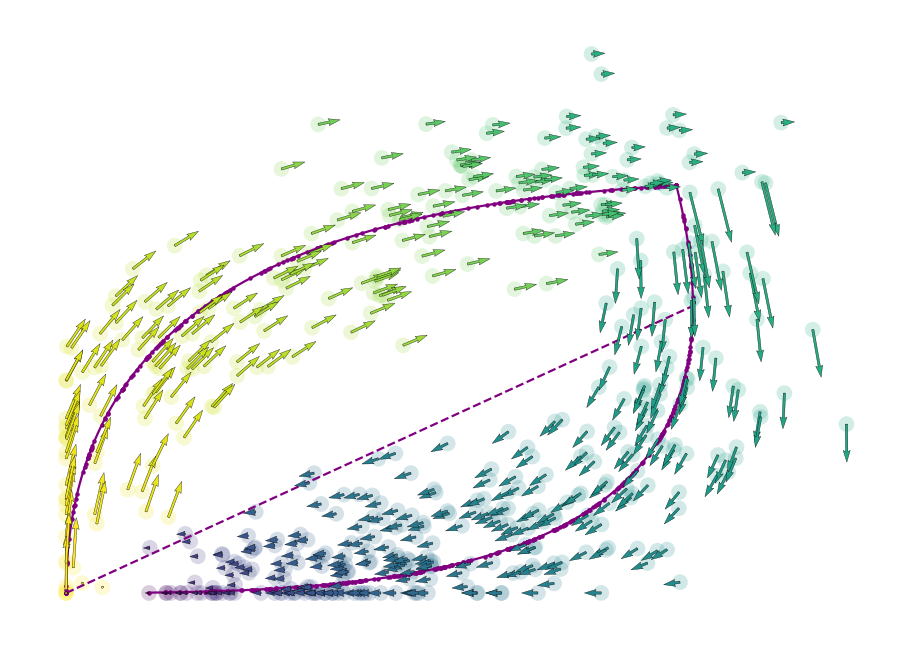

In [8]:
v_kwargs = {'vkey': 'steady_state_velocity', 'use_raw': True}
kwargs = {'size': 1, 'frameon': False, 'legend_loc': 'none', 'title': '', 'linewidth': .25, 'colorbar': False}

scv.tl.velocity(adata, mode='steady_state', **v_kwargs)
scv.pl.velocity_embedding(adata, basis=basis, color='steady_state_velocity', 
                          color_map='viridis', **v_kwargs, **kwargs)


dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True, max_iter=100)

scv.tl.velocity(adata, mode='dynamical', use_raw=True)

v_kwargs={'vkey': 'velocity', 'size': 200, 'frameon': False, 'title': '',
          'legend_loc': 'none', 'linewidth': .15, 'colorbar': False}


ax = scv.pl.scatter(adata, basis=basis, vkey='dynamics', size=1, use_raw=True, 
                    legend_loc='none', linewidth=1, show=False)

scv.pl.velocity_embedding(adata, basis=basis, color='fit_t', color_map='viridis_r', 
                          use_raw=True, **v_kwargs, ax=ax, save='3')

recovering dynamics
    finished (0:00:00)

outputs model fit of gene: 1
saving figure to file ./figures/scvelo_fig1_5.pdf


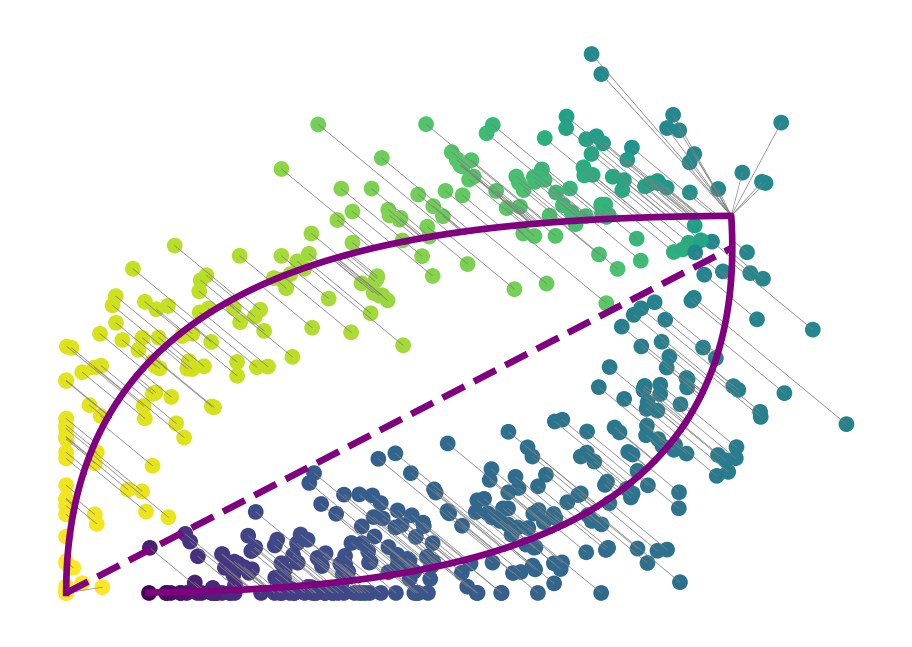

In [9]:
dm = scv.tl.recover_dynamics(adata, var_names=basis, max_iter=2, use_raw=True)

kwargs = {'fontsize': 18, 'size': 200, 'linewidth': 3, 'use_raw': True,
          'legend_loc': 'none', 'colorbar': False, 'frameon': False, 'title': ''}

scv.pl.scatter(adata, basis=basis, vkey='dynamics', color='fit_t', color_map='viridis_r', 
               show_assignments=True, **kwargs, save='5')

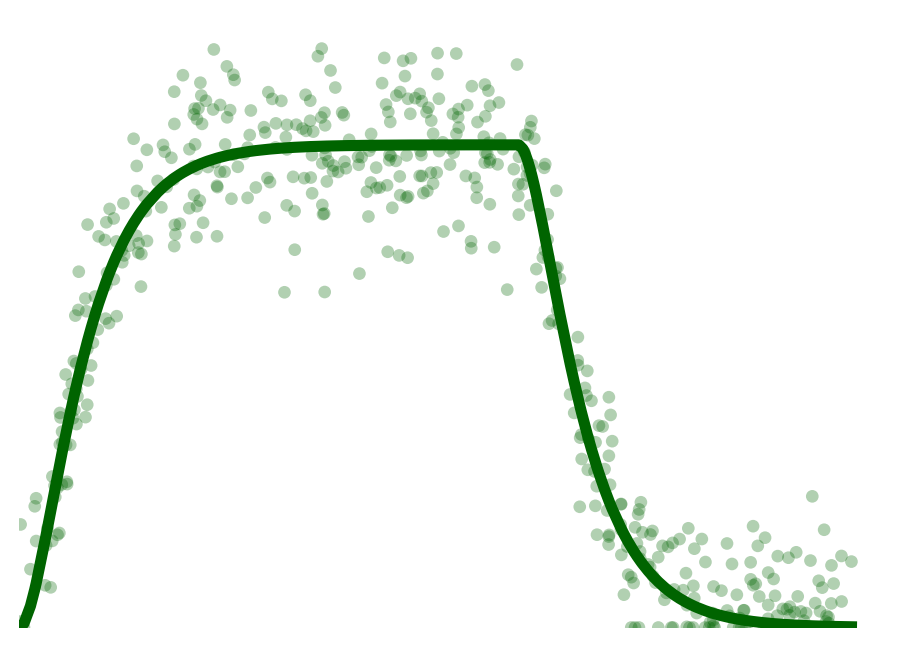

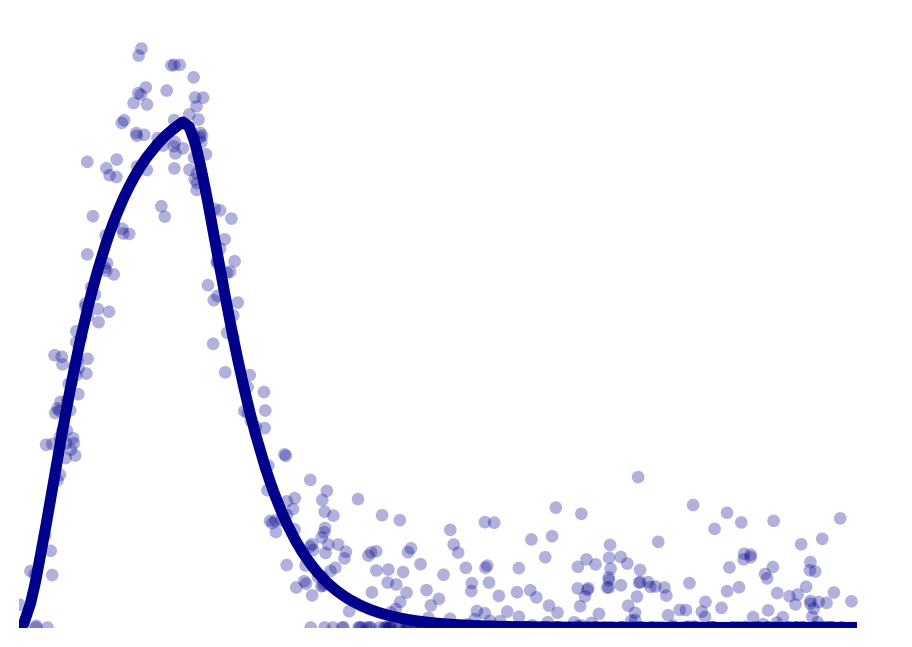

In [10]:
bdata = scv.datasets.simulation(n_obs=500, t_max=120, beta=.3, gamma=.15, switches=[.6, .2], noise_level=1)

sim_kwargs = {'ykey': 'spliced', 'linewidth': 5, 'legend_loc': 'none', 'frameon': False}
scv.pl.simulation(bdata, var_names=bdata.var_names[0], colors=['darkgreen'], **sim_kwargs)
scv.pl.simulation(bdata, var_names=bdata.var_names[1], colors=['darkblue'],  **sim_kwargs)

recovering dynamics
    finished (0:00:00)

outputs model fit of gene: 1


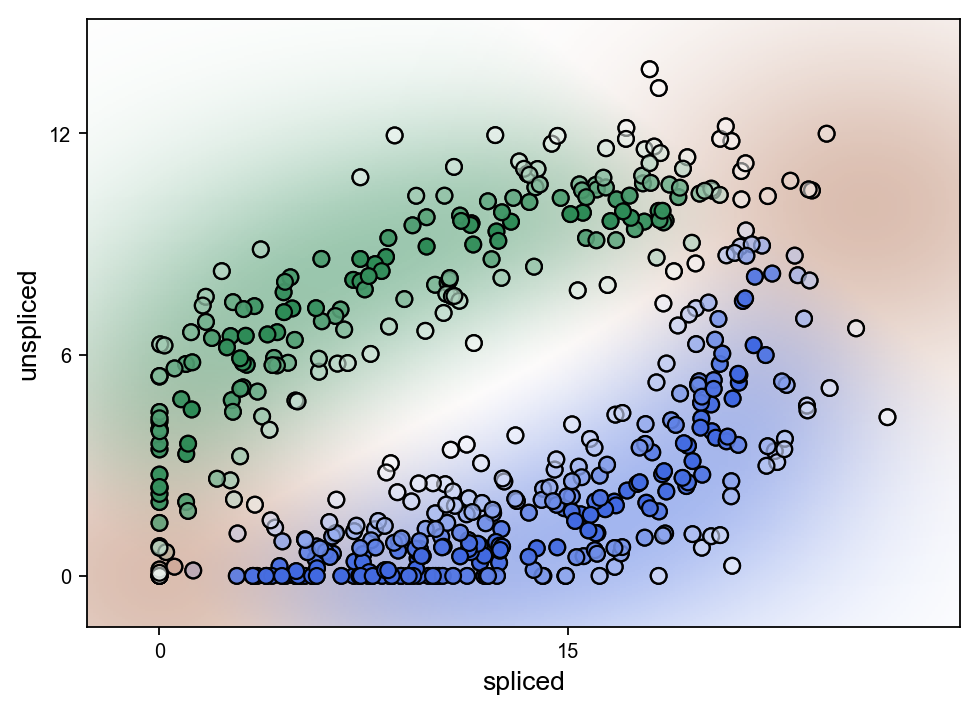

In [11]:
dm = scv.tl.recover_dynamics(adata, var_names=basis, use_raw=True)
dm.plot_state_likelihoods(continuous=True)